# 지도학습
지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용해야한다.
이런 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만든다.
우리의 목표는 이전에 본적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다.
지도 학습은 종종 훈련 데이터를 만드는 데 사람의 노력이 필요하지만 자동화하면 힘들고 어려운 작업의 속도를 높일 수 있다.

## 분류와 회귀
분류 - 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는것.
이진 분류와 다중 분류로 나뉜다.
회귀 - 연속적인 숫자, 또는 부동소수점수를 예측하는 것.
어떤사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는것이 회귀문제의 한 예이다.


Text(0, 0.5, 'second characteristic')

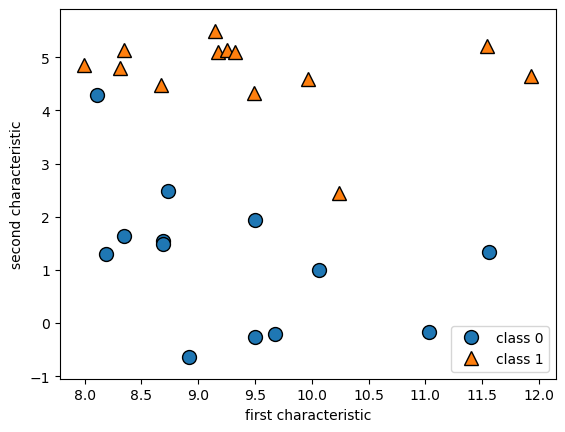

In [88]:
import mglearn
import matplotlib.pyplot as plt
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("first characteristic")
plt.ylabel("second characteristic")
# print("X.shape",X.shape)

Text(0, 0.5, 'target')

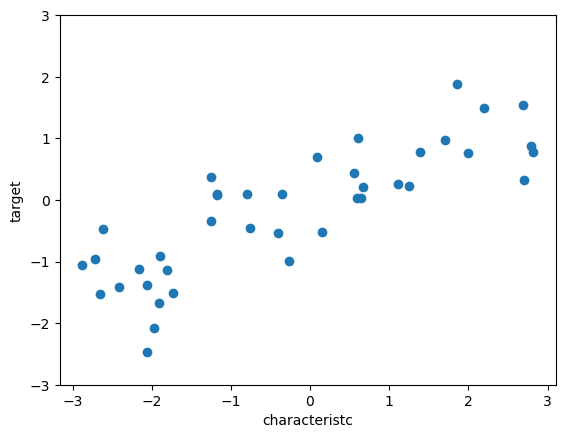

In [89]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("characteristc")
plt.ylabel("target")


In [90]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())
print(cancer.DESCR)


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest v

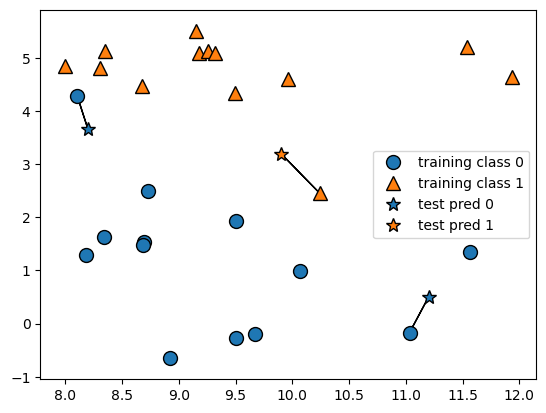

In [91]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

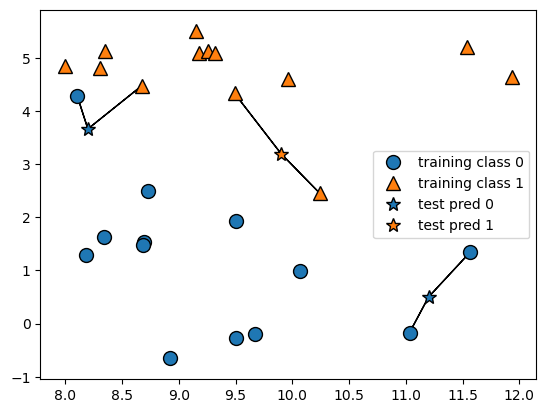

In [92]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)

print("테스트 세트 예측 : ",clf.predict(X_test))
print("테스트 세트 정확도 :{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 예측 :  [1 0 1 0 1 0 0]
테스트 세트 정확도 :0.86


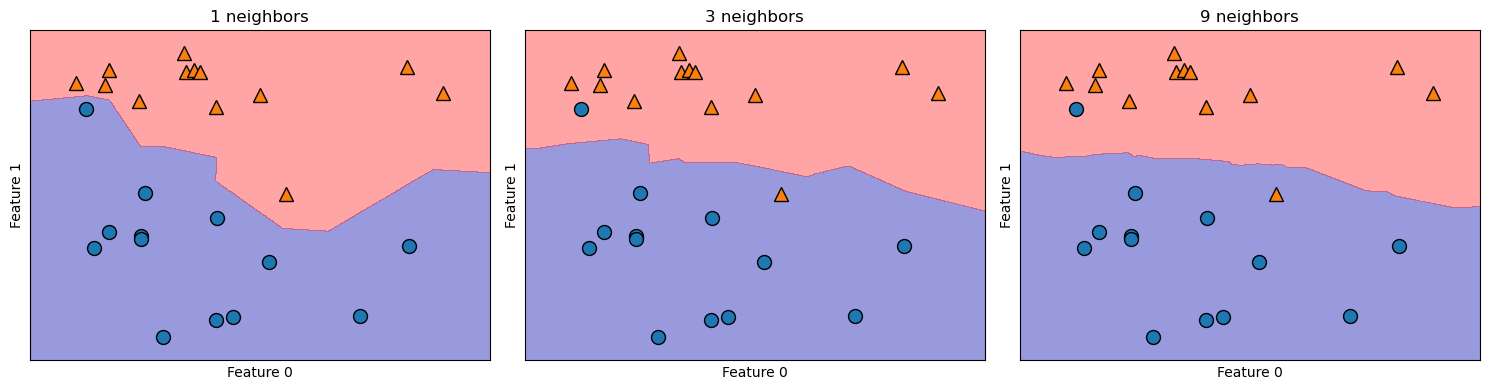

In [94]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier

# Forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 3개의 서브플롯: n_neighbors = 1, 3, 9
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)

    # 결정 경계 시각화
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    ax.set_title(f"{n_neighbors} neighbors")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.tight_layout()
plt.show()


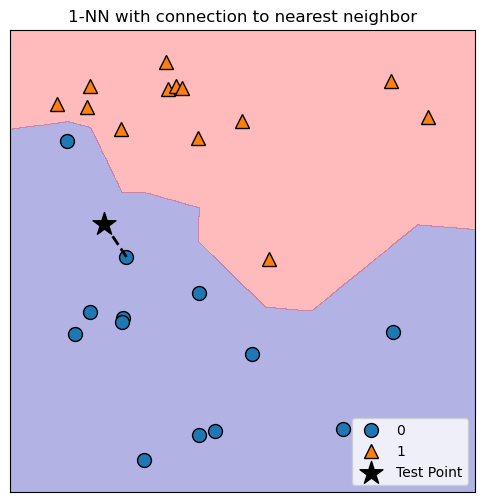

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

# 데이터 생성
X, y = mglearn.datasets.make_forge()
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

# 테스트할 좌표 하나 지정 (왼쪽 위 모서리 근처 점)
test_point = np.array([[8.5, 3.0]])  # 너가 보고 있는 영역 위치에 맞게 조절 가능

# 가장 가까운 이웃 찾기
distances = euclidean_distances(test_point, X)[0]
nearest_index = np.argsort(distances)[:1]  # k=1 이므로 한 개만 선택

# 시각화
fig, ax = plt.subplots(figsize=(6, 6))
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
ax.scatter(test_point[:, 0], test_point[:, 1], marker="*", s=300, c="black", label="Test Point")

# 연결선 그리기
for idx in nearest_index:
    x_vals = [test_point[0, 0], X[idx, 0]]
    y_vals = [test_point[0, 1], X[idx, 1]]
    ax.plot(x_vals, y_vals, "k--", lw=2)

ax.legend()
ax.set_title("1-NN with connection to nearest neighbor")
plt.show()


## 결정경계를 그리는 알고리즘 직접 구현

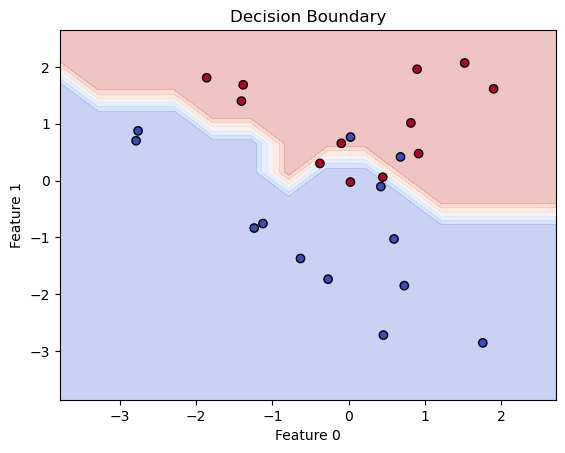

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# 데이터셋 생성
X, y = make_classification(n_samples=25, n_features=2, n_classes=2, n_redundant=0, random_state=42)
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)

# --- 직접 구현한 결정 경계 시각화 --- #
def plot_decision_boundary(model, X, y, eps=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 1. 격자 만들기 (meshgrid)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

    # 2. meshgrid 좌표를 (N, 2) 모양으로 변환
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # 3. 각 좌표에 대해 예측값 구하기
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # 4. 배경 색칠
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 5. 실제 데이터 점 찍기
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title("Decision Boundary")
    plt.show()

# 함수 실행
plot_decision_boundary(clf, X, y, eps=0.5)


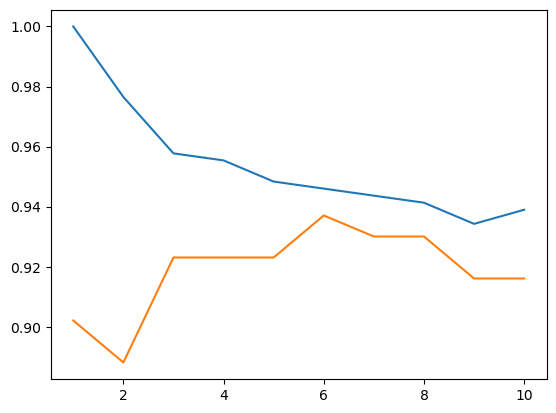

In [97]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []


#1에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,11)


for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(x_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")



## k-최근접 이웃 회귀

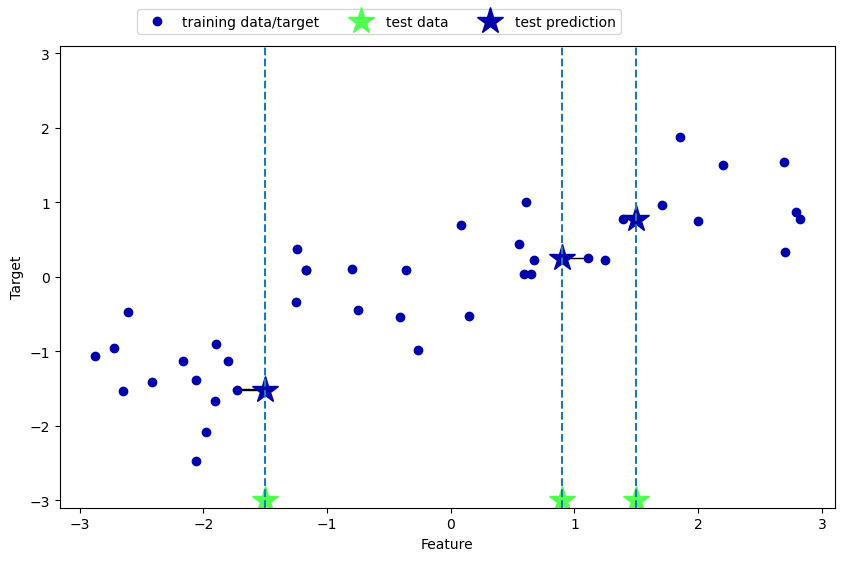

In [98]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

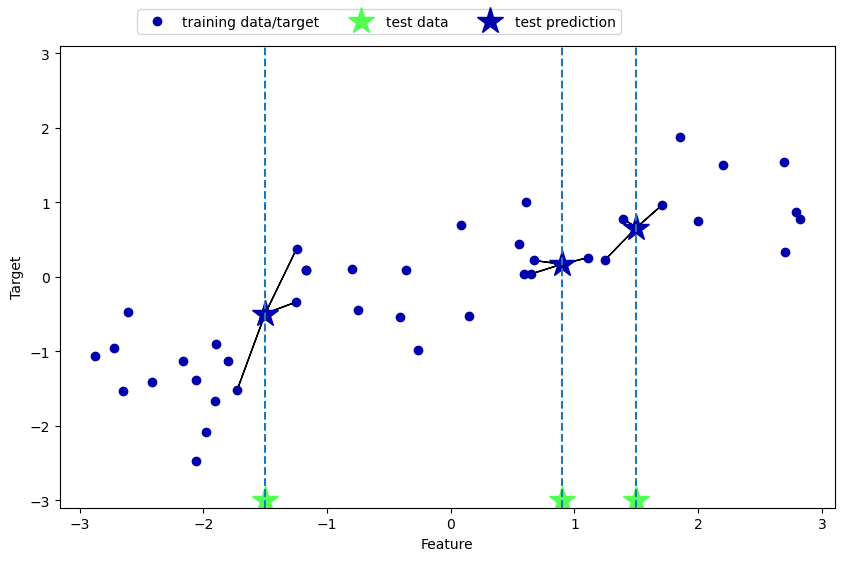

In [99]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


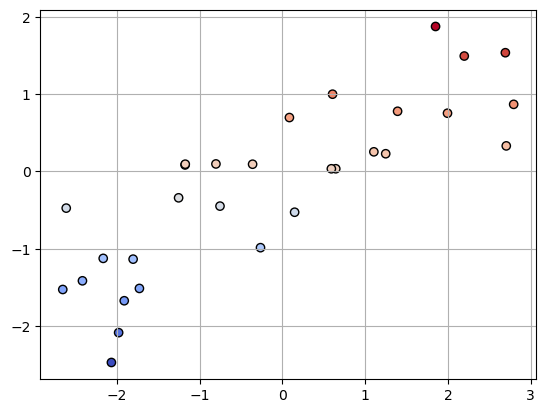

In [100]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# print(X_train[:,0])
# print(y_train)

# print(np.shape(X_train[:,0]))
# print(np.shape(y_train))

scatter = plt.scatter(X_train[:,0], y_train, c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.grid(True)

reg= KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

print("테스트 세트 예측 : \n",reg.predict(X_test))

## KNeighborsRegressor 분석

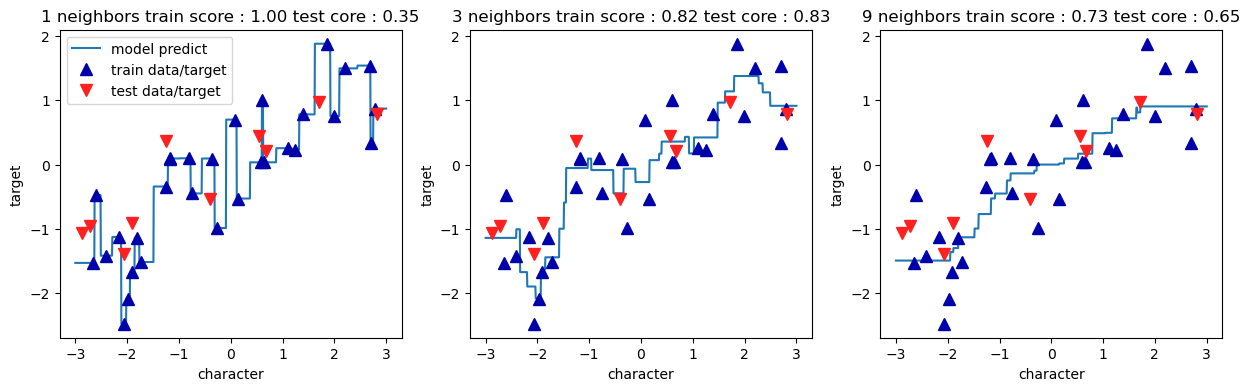

In [101]:
fig,axes = plt.subplots(1,3, figsize=(15,4))
#-3과 3 사이에 1000개의 데이터 포인트를 만든다.
line = np.linspace(-3,3,1000).reshape(-1,1) # -1은 자동으로 행 또는 열을 맞춰주는 것.
for n_neighbors, ax in zip([1,3,9],axes):
    #1,3,9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    ax.set_title(
        "{} neighbors train score : {:.2f} test core : {:.2f}".format(
            n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)))

    ax.set_xlabel("character")
    ax.set_ylabel("target")

axes[0].legend(["model predict","train data/target","test data/target"],loc="best")



## 장단점과 매개 변수
knn의 장점은 이해하기 쉬운 매우 쉬운 모델이고 많이 조정하지 않아도 자주 좋은 성능을 발휘한다.
더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점이다.
보통 최근점 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련세트가 매우크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려진다.
knn 알고리즘이 이해하긴 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다.
이런 단점이 없는 알고리즘이 선형모델이다.

# 선형모델
선형모델은 약 100 년전에 개발되었고, 지난 몇 십년 동안 폭넓게 연구되고 현재도 널리 쓰인다.
선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.

## 회귀의 선형모델
$$ \hat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b$$
이 식에서 $ x[0] $ 부터 $x[p]$ 까지는 하나의 데이터 포인트에 대한 특성을 나타내며, w 와 b는 모델이 학습할 파라미터 이다.
그리고 $\hat{y}$ 은 모델이 만들어낸 예측값이다.
특성이 하나인 데이터셋이라면 이 식은 다음과 같아진다.
$$ \hat{y} = w[0] \times x[0] + b $$


w[0]: 0.393906  b: -0.031804


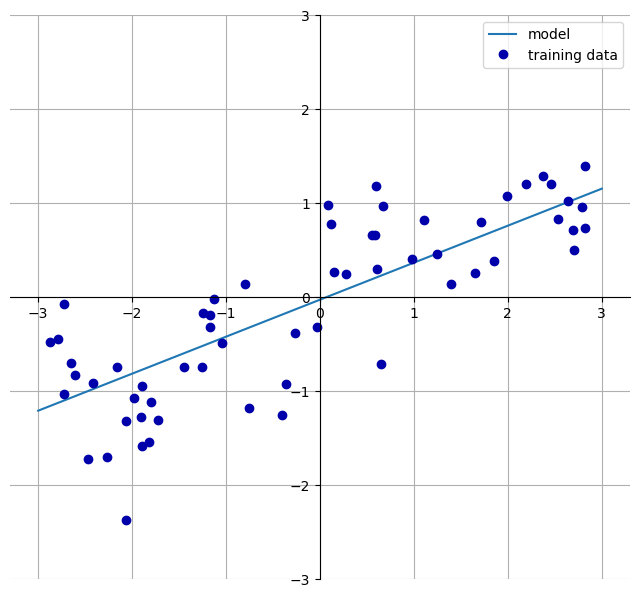

In [102]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 도며, 더 높은 차원(특성이 더 많음)에서는 초평면이 되는 회귀모델의 특징을 가지고 있다.
이 직선과 KNeighborsRegressor 를 사용하여 만든 그림의 선과 비교해보면 직선을 사용한 예측이 예측이 더 제약이 많아보인다.
타깃 y가 특성들의 선형 조합이라는 것은 매우 과한 가정이다. 하지만 1차원 데이터만 놓고봐서 생긴 편견일 수 있다.
특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼수 있다.
특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게(훈련 세트에 대해서) 선형 함수로 모델링할수 있다.

## 선형 회귀(최소 제곱법)
선형 회귀 또는 최소 제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘이다.
선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b 를 찾는다.
평균제곱오차(MSE)는 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다.
$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$



LinearRegression 에 데이터를 넣으면 최소제곱법 알고리즘을 통해 기울기(coef_), 절편(intercept_) 를 뽑아낼수 있음.
intercept_ 속성은 항상 실수 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열이다.
wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있다.

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759704


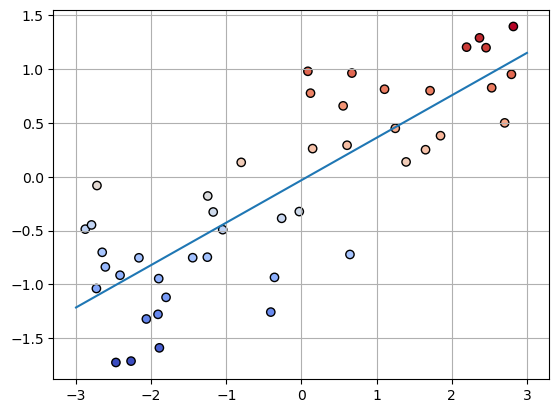

In [113]:
from sklearn.linear_model import LinearRegression


X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
scatter = plt.scatter(X_train[:,0], y_train, c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

# y = ax + b
x = np.linspace(-3,3,1000)
y = lr.coef_ * x + lr.intercept_

plt.plot(x,y)
plt.grid(True)

## 선형회귀 직접 구현

### 우리가 구하고 싶은것
- 기울기 a
- 절편 b

#### 최소제곱법 공식
$$ a = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2} $$

기울기 a = 1.2
절편 b = 2.4000000000000004
9.6


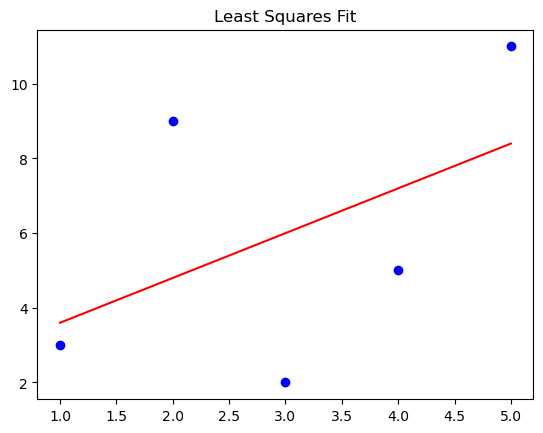

In [120]:
import numpy as np
import matplotlib.pyplot as plt
# 예제 데이터
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 9, 2, 5, 11])

# 평균 계산
x_mean = np.mean(x)
y_mean = np.mean(y)

# a (기울기) 계산
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
a = numerator / denominator

# b (절편) 계산
b = y_mean - a * x_mean

print(f"기울기 a = {a}")
print(f"절편 b = {b}")

# 예측 함수
def predict(x_new):
    return a * x_new + b

# 예측해보기
print(predict(6))  # 예를 들면 x=6일 때 y 예측

# 데이터 점 찍기
plt.scatter(x, y, color='blue')

# 예측한 직선 그리기
x_line = np.linspace(min(x), max(x), 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color='red')

plt.title('Least Squares Fit')
plt.show()

### 다변수 최소 제곱법 구현
- 입력특징
    - $x_1$ : 공부시간
    - $x_2$ : 잠자는 시간
    - $x_3$ : 유튜브 본 시간
- 출력값
    - y = 시험점수

#### 역행렬 공식
$$ w = (X^T X)^{-1}X^Ty $$

In [125]:
import numpy as np

# 입력 데이터 (5명 학생)
X = np.array([
    [2, 7, 1],  # 2시간 공부, 7시간 잠, 1시간 유튜브
    [3, 6, 2],
    [4, 5, 1],
    [5, 6, 3],
    [6, 5, 2]
])

# 정답 (시험 점수)
y = np.array([70, 75, 80, 85, 90])

# X 에 절편항 추가
X_b = np.c_[X,np.ones(X.shape[0])]
w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Weight (w1, w2, w3)와 절편 (b):")
print(w)

Weight (w1, w2, w3)와 절편 (b):
[5.00000000e+00 5.93303184e-13 1.24344979e-14 6.00000000e+01]


## 역행렬 공식으로 푼 최소제곱법

[2.77011339]
[4.21509616]


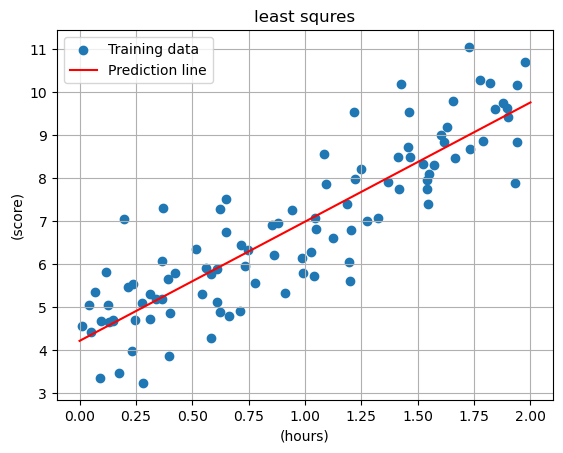

In [184]:
import numpy as np
import matplotlib.pyplot as plt

#랜덤 시드 고정
np.random.seed(42)
# 공부시간
X = 2 * np.random.rand(100,1)
# 시험 점수 y
y = 4 + 3*X + np.random.randn(100,1)

X_b = np.c_[X,np.ones((X.shape[0],1))]

w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(w[0])
print(w[1])
# 예측용 직선 만들기
X_new = np.array([[0], [2]])  # x=0부터 x=2까지
X_new_b = np.c_[X_new, np.ones((X_new.shape[0], 1))]
y_predict = X_new_b @ w

# 그래프 그리기
plt.scatter(X, y, label="Training data")
plt.plot(X_new, y_predict, color="red", label="Prediction line")
plt.xlabel('(hours)')
plt.ylabel('(score)')
plt.title('least squres')
plt.legend()
plt.grid(True)
plt.show()

## 하지만 X가 하나의 차원만을 가지고 있으므로 오차제곱합으로도 풀수 있음
$$a = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$

$$ b = \bar{y} - a\bar{x} $$

기울기 a = 2.770113386438484
절편 b = 4.215096157546746
[2.07503719 5.26717285 4.05541243 3.31670376 0.86437865 0.86424502
 0.32179638 4.79881227 3.33031348 3.92288265 0.11404277 5.37352053
 4.61192101 1.17640683 1.00735155 1.01610258 1.68557102 2.90726963
 2.39307336 1.61347548 3.38980379 0.77282762 1.6185476  2.02972769
 2.52673114 4.35005288 1.10623803 2.8489754  3.28211106 0.25734582
 3.36593625 0.94474232 0.36040058 5.25704106 5.34982044 4.47870463
 1.68762936 0.54112566 3.79080613 2.43854463 0.6761195  2.74339237
 0.19052021 5.03784124 1.43369978 3.6705237  1.72695005 2.88129477
 3.02889893 1.0241356  5.37171871 4.29441162 5.20503719 4.95754644
 3.31250147 5.10739232 0.49026853 1.0857895  0.25056944 1.80240381
 2.15336033 1.50333517 4.59139374 1.97649433 1.55644089 3.00665937
 0.78075216 4.44435319 0.41302747 5.46757743 4.27841115 1.10092994
 0.03059378 4.51784124 3.91614998 4.03886503 4.27301262 0.41022416
 1.98598143 0.64194087 4.78178871 3.45321297 1.8332501  0.35212767
 1.72291258

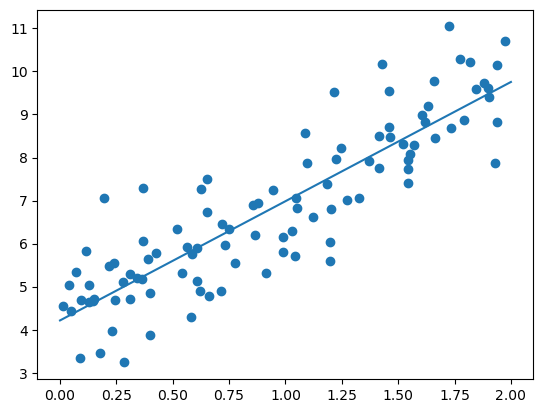

In [194]:
_X = X[:,0]
_Y = y[:,0]

#기울기 구하기
x_mean = np.mean(_X)
y_mean = np.mean(_Y)

plt.scatter(_X, _Y, label="Training data")
numerator = np.sum((_X - x_mean) * (_Y - y_mean))
denominator = np.sum((_X - x_mean) ** 2)
a = numerator / denominator

b = y_mean - a * x_mean

print(f"기울기 a = {a}")
print(f"절편 b = {b}")

print(a * _X)이
plt.plot(X_new, (a*X_new) + b)

## 리지 회귀
Ridge도 회귀를 위한 선형모델 이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용한다.
리지 회귀에서의 가중치 (w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.
가중치의 절대값을 가능한 한 작게 만드는 것이다. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원한다.


In [127]:
from sklearn.linear_model import Ridge


X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))


훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66
